After generating pose json files with https://github.com/tensorflow/tfjs-models/tree/master/pose-detection/demos. The files are made with the blazepose setting and produce around 850 poses which equates to an average 14 to 15 FPS in 60 seconds. We will upload those jsons to a jupyter notebook to look at patterns.

Json poses require some cleaning which will happen in this notebook before examining patterns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

<div>
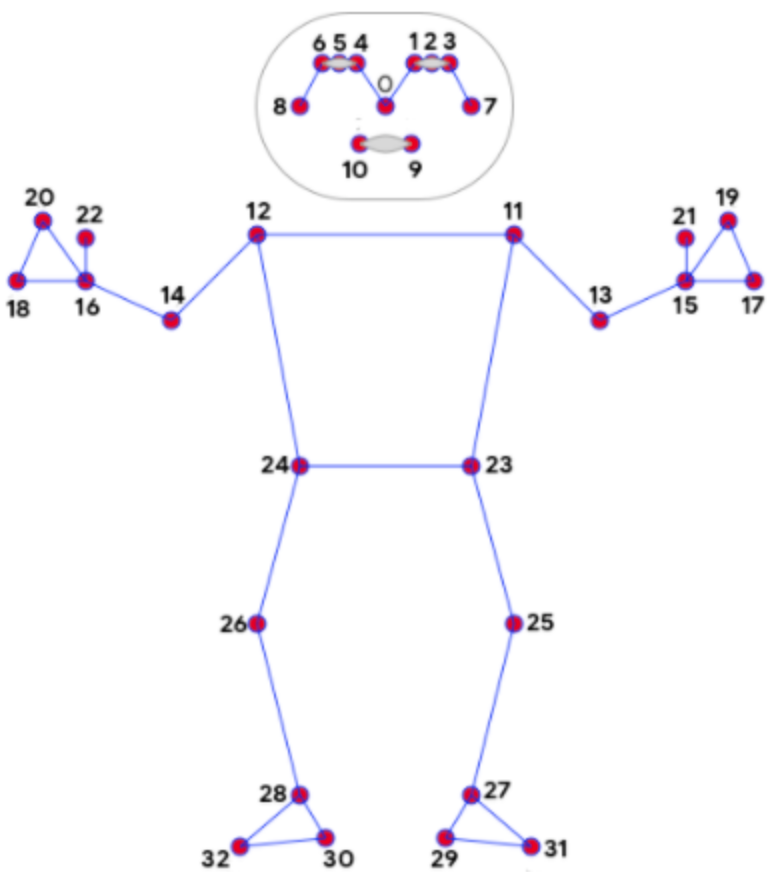
</div>

In [2]:
poses_1 = pd.read_csv("blazepose_csv/person1.csv", index_col=0)
poses_1['Person'] = 1

poses_2 = pd.read_csv("blazepose_csv/person2.csv", index_col=0)
poses_2['Person'] = 2

poses_3 = pd.read_csv("blazepose_csv/person3.csv", index_col=0)
poses_3['Person'] = 3

In [12]:
combined = pd.concat([poses_1, poses_2, poses_3], ignore_index=True)

## Column descriptions
Columns indexed 
- 0 is the frame count
- 1 to 33 are the x axis values
- 34 to 66 are the y axis values (access through `poses.iloc[:, 34:67]`)
- 67 to 99 are the score values

2553 rows, 851 per person

In [6]:
combined

,frame,nose_x,left_eye_inner_x,left_eye_x,left_eye_outer_x,right_eye_inner_x,right_eye_x,right_eye_outer_x,left_ear_x,right_ear_x,...,right_hip_score,left_knee_score,right_knee_score,left_ankle_score,right_ankle_score,left_heel_score,right_heel_score,left_foot_index_score,right_foot_index_score,Person
0,0,761.265460,767.208088,772.668730,776.141169,752.245392,746.790194,742.567051,776.953676,732.284044,...,0.999489,0.943629,0.989620,0.888427,0.958677,0.755355,0.721126,0.885620,0.915897,1
1,1,765.001892,772.472916,778.001803,782.664788,755.844063,750.570979,745.718260,787.628335,739.789794,...,0.999482,0.944937,0.988970,0.880122,0.955460,0.736900,0.706026,0.877547,0.911047,1
2,2,771.297245,777.089418,782.025350,786.048754,760.468549,754.803615,750.330085,788.332729,741.936949,...,0.999504,0.938800,0.983098,0.836420,0.941570,0.675904,0.665578,0.834606,0.888905,1
3,3,771.600942,777.215763,782.282664,786.503116,761.475724,755.917205,751.149491,788.462470,742.140836,...,0.999544,0.930180,0.976552,0.787414,0.927262,0.606601,0.626644,0.785807,0.865522,1
4,4,768.161419,775.226075,779.324757,783.637022,759.338747,754.037431,749.994390,786.051328,740.380711,...,0.999575,0.933331,0.975363,0.779720,0.925339,0.574653,0.611826,0.775569,0.861592,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,846,665.664234,676.230412,680.828774,685.590266,660.824286,655.378247,650.708109,689.319761,641.500611,...,0.999982,0.975110,0.978008,0.959610,0.978674,0.838182,0.886856,0.958048,0.974217,3
2549,847,674.548215,683.989121,688.166684,692.055753,668.401883,662.874683,657.314464,692.399448,646.884246,...,0.999983,0.975420,0.979986,0.963502,0.981538,0.841275,0.892175,0.961377,0.976831,3
2550,848,673.715708,682.105709,687.033086,692.225329,666.811656,660.638251,656.025181,692.752652,645.930414,...,0.999984,0.974857,0.981568,0.966929,0.983987,0.846449,0.898943,0.964352,0.979170,3
2551,849,669.125348,678.231888,683.857953,688.410894,662.451741,657.034862,652.045822,690.961015,642.441597,...,0.999985,0.975196,0.983049,0.969951,0.986313,0.853190,0.905918,0.967473,0.981733,3


In [9]:
combined.describe()

,frame,nose_x,left_eye_inner_x,left_eye_x,left_eye_outer_x,right_eye_inner_x,right_eye_x,right_eye_outer_x,left_ear_x,right_ear_x,...,right_hip_score,left_knee_score,right_knee_score,left_ankle_score,right_ankle_score,left_heel_score,right_heel_score,left_foot_index_score,right_foot_index_score,Person
count,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,...,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000
mean,425.000000,707.597268,714.820519,719.553607,723.621013,700.709100,695.929973,691.431370,726.292017,683.746475,...,0.999824,0.903511,0.937110,0.864669,0.908115,0.710562,0.726435,0.865557,0.884901,2.000000
std,245.710497,101.819225,101.222111,100.821914,100.420930,101.566943,101.446568,101.310956,98.707690,99.890682,...,0.000270,0.101263,0.076400,0.173560,0.126677,0.228875,0.210509,0.176437,0.151837,0.816657
min,0.000000,221.546516,229.039402,235.168640,240.858652,213.766022,210.093260,205.958703,253.904938,206.570760,...,0.998543,0.386393,0.454927,0.166356,0.387016,0.154025,0.187251,0.186103,0.316813,1.000000
25%,212.000000,670.589049,678.044742,682.468244,686.577548,664.182552,659.419394,654.857895,689.218317,647.475261,...,0.999788,0.855513,0.923802,0.785480,0.869980,0.542010,0.580695,0.792324,0.833841,1.000000
50%,425.000000,707.826950,714.890339,719.603095,723.634102,700.683861,695.769862,691.559805,725.944463,683.903016,...,0.999961,0.944937,0.967303,0.957100,0.972970,0.813361,0.808555,0.964637,0.964772,2.000000
75%,638.000000,748.726913,756.296776,761.045221,765.332345,741.813403,737.186855,732.465875,767.579689,725.333415,...,0.999980,0.980606,0.986433,0.986411,0.990856,0.890480,0.897041,0.985984,0.987132,3.000000
max,850.000000,1122.756815,1124.752398,1128.341038,1131.238066,1112.882427,1107.571944,1101.283190,1125.767216,1083.691678,...,0.999995,0.997532,0.998699,0.998796,0.999155,0.981776,0.980807,0.998525,0.998671,3.000000


# Exploratory Data Visualizations & Analysis

In [11]:
# WANTING TO PLOT HISTOGRAMS OF MOVEMENT
# g = sns.PairGrid(poses_1.iloc[:, 1:33])
# g.map(sns.scatterplot)

# Ideas
normalize data across participants (accounting for height and etc)
can generate sequences of actions based on coordinates of movement

- maybe looking at nose?, knees, and hand?
